In [1]:
#!pip install -U numpy
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import zipfile
import os 
from PIL import Image
import geopandas as gpd
import rasterio.mask
import fiona
import pandas as pd
from rasterstats import zonal_stats
!pip install matplotlib-scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as mcolors

  Using cached matplotlib_scalebar-0.8.1-py2.py3-none-any.whl (17 kB)


In [2]:
dataSMB = np.loadtxt('SMB_data.txt')
T = dataSMB[:,1]
YT = dataSMB[:,0]
YK = dataSMB[:,2]
K = dataSMB[:,3]
YD = dataSMB[:,4]
D = dataSMB[:,5]
YBr = dataSMB[:,6]
Br = dataSMB[:,7]
YE = dataSMB[:,8]
E = dataSMB[:,9]
YB = dataSMB[:,10]
B = dataSMB[:,11]
YH = dataSMB[:,12]
H = dataSMB[:,13]
YS = dataSMB[:,14]
S = dataSMB[:,15]
YG = dataSMB[:,16]
G = dataSMB[:,17]
SMBVat = np.loadtxt('SMB_Vat.txt')
Vatyear = SMBVat[:,0]
VatSMB = SMBVat[:,1]

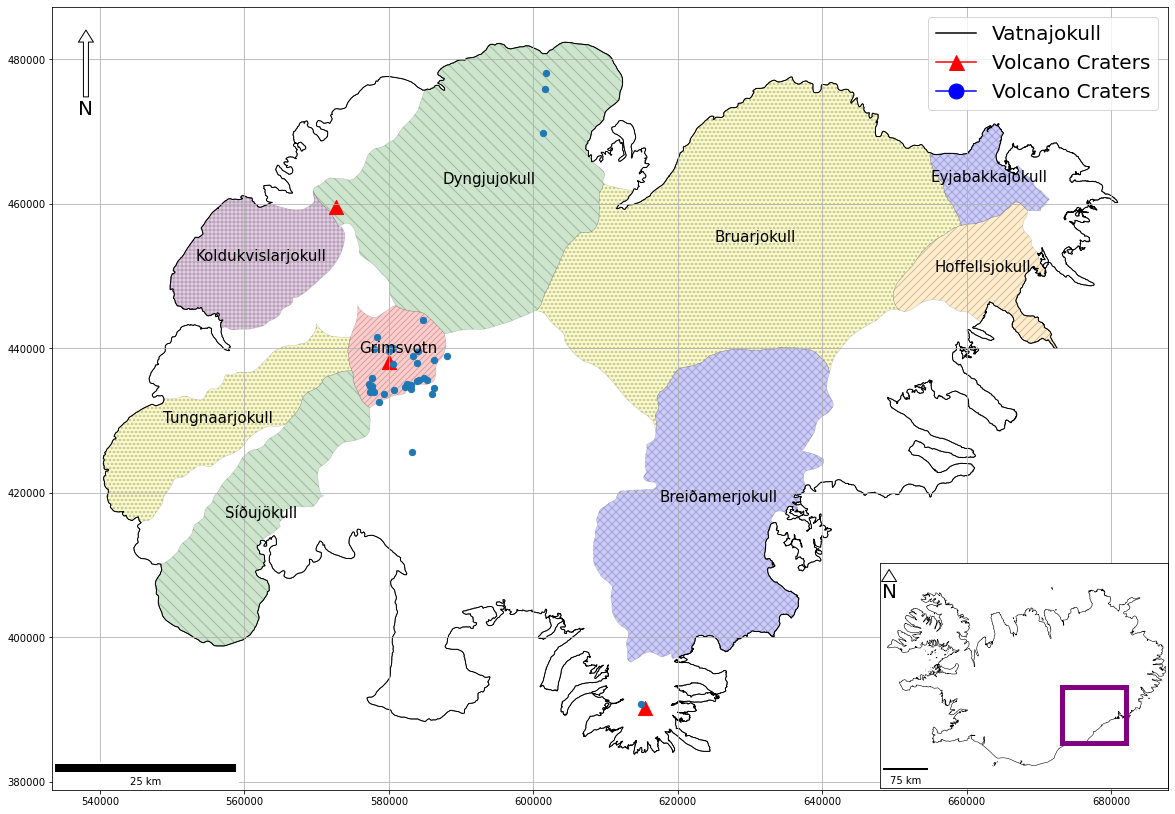

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Polygon
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(20, 20))

shp_dir = "shp"

shp_files = [f for f in os.listdir(shp_dir) if f.endswith(".shp")]

colors = ["red", "blue", "green", "yellow", "purple", "orange"]
hatches = ["////", "xxx", "\\\\", "ooo", "+++", "///"]

legend_handles = []

for i, shp_file in enumerate(shp_files):
    gdf = gpd.read_file(os.path.join(shp_dir, shp_file))
    centroid = gdf.centroid.iloc[0]
    label = os.path.splitext(shp_file)[0]
    if shp_file == "Vatnajokull.shp":
        gdf.plot(ax=ax, facecolor="none", linewidth=0.5, edgecolor="black", zorder=0)
    else:
        gdf.plot(ax=ax, facecolor=colors[i % len(colors)], linewidth=0.5, edgecolor='black', hatch=hatches[i % len(hatches)], alpha=0.2, zorder=1)
        polygon = gdf.geometry.iloc[0]  # get the polygon geometry
        bounds = Polygon(polygon.exterior.coords).bounds  # compute the bounds of the polygon
        ax.annotate(label, xy=(centroid.x, centroid.y), xytext=(5, 5), textcoords="offset points", fontsize=15, color="black", ha="center", va="center")
               
ax.grid(True)
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

iceland = gpd.read_file(os.path.join("Iceland.shp"))

ax2 = fig.add_axes([0.7, 0.21, 0.2, 0.2])  # [left, bottom, width, height]

ax2.set_ylim(63, 67)
ax2.set_xlim(-24.8, -13.4)

iceland.plot(ax=ax2, color="white", edgecolor="black", linewidth=0.5)

ax2.set_xticks([])
ax2.set_yticks([])

rect=mpatches.Rectangle((-17.6,63.8),2.5,1, 
                        fill=False,
                        color="purple",
                       linewidth=5)
plt.gca().add_patch(rect)

x, y, arrow_length = 0.03, 0.97, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
ax2.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax2.transAxes)

scalebar = ScaleBar(43000, location='lower left')
ax2.add_artist(scalebar)

vat = gpd.read_file('shp/Vatnajokull.shp')
vat.plot(ax=ax, facecolor='none', edgecolor='black', label='Vatnajokull', legend=True)

volcano = gpd.read_file('Vatnajokull_volcano.shp')
volcano.plot(marker='^',ax=ax, markersize=200, color='red', label='Volcano Craters', legend=True)
ax2.grid(True)

line2 = Line2D([0], [0], label='Vatnajokull', color='black')
triangle = Line2D([], [], color='red', marker='^',
                          markersize=15, label='Volcano Craters')
circle = Line2D([], [], color='blue', marker='o',
                          markersize=15, label='Volcano Craters')
ax.legend(handles=[line2, triangle, circle], fontsize=20)

cauldrons = gpd.read_file(os.path.join("ice_cauldron.shp"))
cauldrons.plot(ax=ax, markersize=40, marker='o')

plt.show()
       
        

Text(2018.1, -1.6, 'High accumulation')

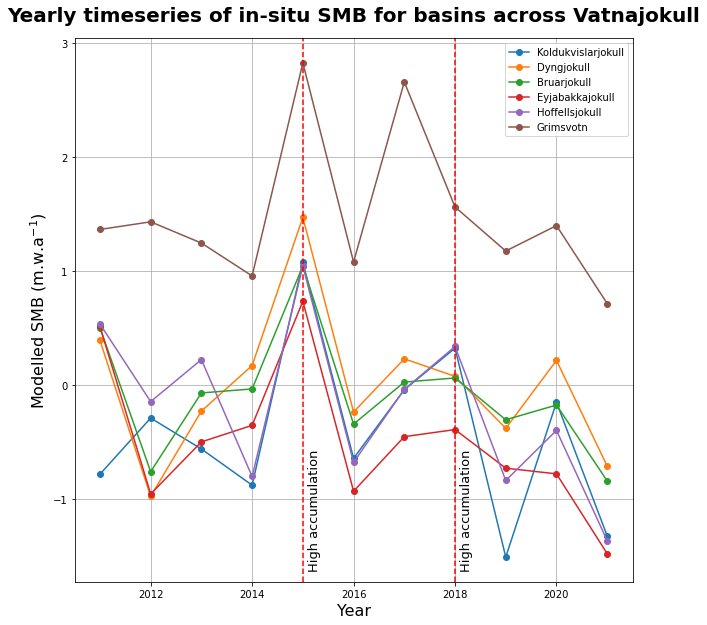

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.plot(YT, T, label='T', marker='o')
plt.plot(YK,K, label='Koldukvislarjokull', marker='o')
plt.plot(YD,D, label='Dyngjokull', marker='o')
plt.plot(YBr, Br, label='Bruarjokull', marker='o')
plt.plot(YE, E, label='Eyjabakkajokull', marker='o')
#plt.plot(YB, B, label='B', marker='o')
plt.plot(YH, H, label='Hoffellsjokull', marker='o')
#plt.plot(YS, S, label='Síðujökull', marker='o')
plt.plot(YG, G, label='Grimsvotn', marker='o')
#plt.plot(Vatyear, VatSMB, label = 'SMB Vatnajokull',  marker='o')
plt.legend(loc='upper right', fontsize=10);
#years = list(range(2011, 2022))
#df = pd.DataFrame({'Year': years, 'in-situ SMB': [-0.020444444, -0.637333333, -0.187888889, -0.628111111, 0.957666667, -0.601333333, 0.124888889, 0.145333333, -0.988333333, -0.271777778, -1.105777778]})
#df.plot(kind='line', x='Year', y='in-situ SMB', figsize=(10,10), color='g', marker='o')
plt.ylabel('Modelled SMB (m.w.$\mathregular{a^{-1}}$)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.rcParams.update({'font.size': 14})
plt.grid(True)
plt.title('Yearly timeseries of in-situ SMB for basins across Vatnajokull', fontsize=20, weight='extra bold', pad=17);
plt.axvline(2015, color='r', linestyle='dashed')
plt.axvline(2018, color='r', linestyle='dashed')
plt.text(2015.1, -1.6, 'High accumulation', fontsize=13, rotation='vertical')
plt.text(2018.1, -1.6, 'High accumulation', fontsize=13, rotation='vertical')

/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)
/opt/conda/lib/python3.9/site-packages/matplotlib/image.py:487: Runtim

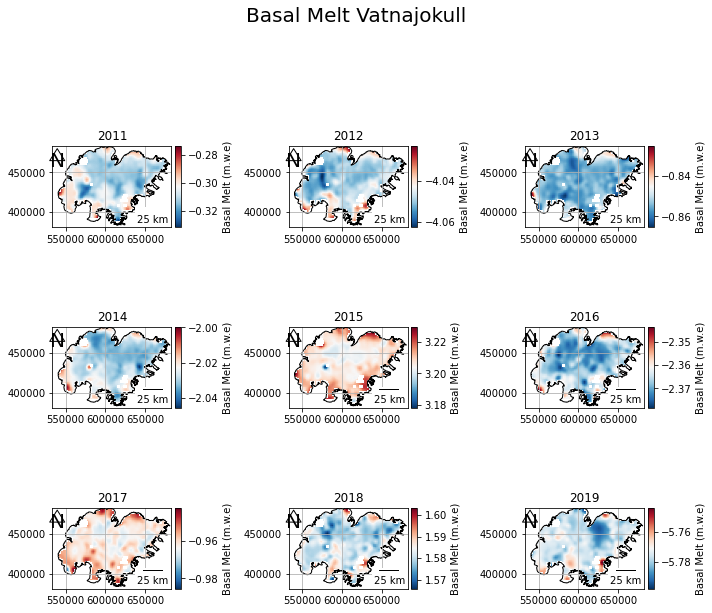

In [18]:
#directory = 'masked_altimetry'
output = 'masked_altimetry'
shpdirectory = 'shp/Vatnajokull.shp'    
#for filename in os.listdir(directory):
    #f = os.path.join(directory, filename)
    #if os.path.isfile(f):
        #with fiona.open('shp/K.shp', 'r') as shapefile:
                #for feature in shapefile: 
                    #shapes = [feature['geometry']]
        #with rasterio.open(f) as src:
            #out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
            #out_meta = src.meta
            #out_meta.update({
                #'driver': 'Gtiff',
                #'height': out_image.shape[1],
                #'width': out_image.shape[2],
                #'transform': out_transform
                #})    
            #with rasterio.open(os.path.join(output, 'clippedK_' + str(filename) + '.tif'), 'w', **out_meta) as dst:
                #dst.write(out_image)

filelist = []
for filename3 in os.listdir(output):
    if filename3.endswith('.tif'):
        filelist.append(filename3)
        
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))


for file, value, ax in zip(filelist, VatSMB , axes.flatten()):
    f1 = os.path.join(output, file)
    if os.path.isfile(f1):
        ds3 = rasterio.open(f1)
        arr3=ds3.read(1, masked=True)
        trs = value - arr3/850
        pixel_sum = np.sum(trs)
        #pixel_count = zonal_stats("shp/Vatnajokull.shp", "masked_altimetry/2011.tif", stats="count")
        bounds = ds3.bounds
        top = bounds.top
        bottom = bounds.bottom
        left = bounds.left
        right = bounds.right
        shapefile = gpd.read_file(shpdirectory)
        
    im = ax.imshow(trs, cmap='RdBu_r', extent=(left, right, bottom, top))
    shapefile.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=ax)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax, label = 'Basal Melt (m.w.e)')
    plt.tight_layout()
    ax.set_title(file.split('.')[0])
    #ax.set_title(file.split('_')[1].split('.')[0], fontsize=20)
    plt.suptitle('Basal Melt Vatnajokull', fontsize=20)
    #plt.savefig('Vatnajokull_basalmelt')
    scalebar = ScaleBar(1, location='lower right')
    ax.add_artist(scalebar)
    x, y, arrow_length = 0.04, 0.97, 0.15
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
    #print(pixel_sum, pixel_count)
    ax.grid(True)   
    plt.savefig('Vatnajokull_basalmelt')
        
      
        


In [12]:
directory5 = 'volcano.shp'
ice_cauldrons = gpd.read_file('ice_cauldron.shp')
Vatnajokull = gpd.read_file('shp/Vatnajokull.shp')
ice_clipped = gpd.clip(ice_cauldrons, Vatnajokull)
volcano = gpd.read_file('Vatnajokull_volcano.shp')

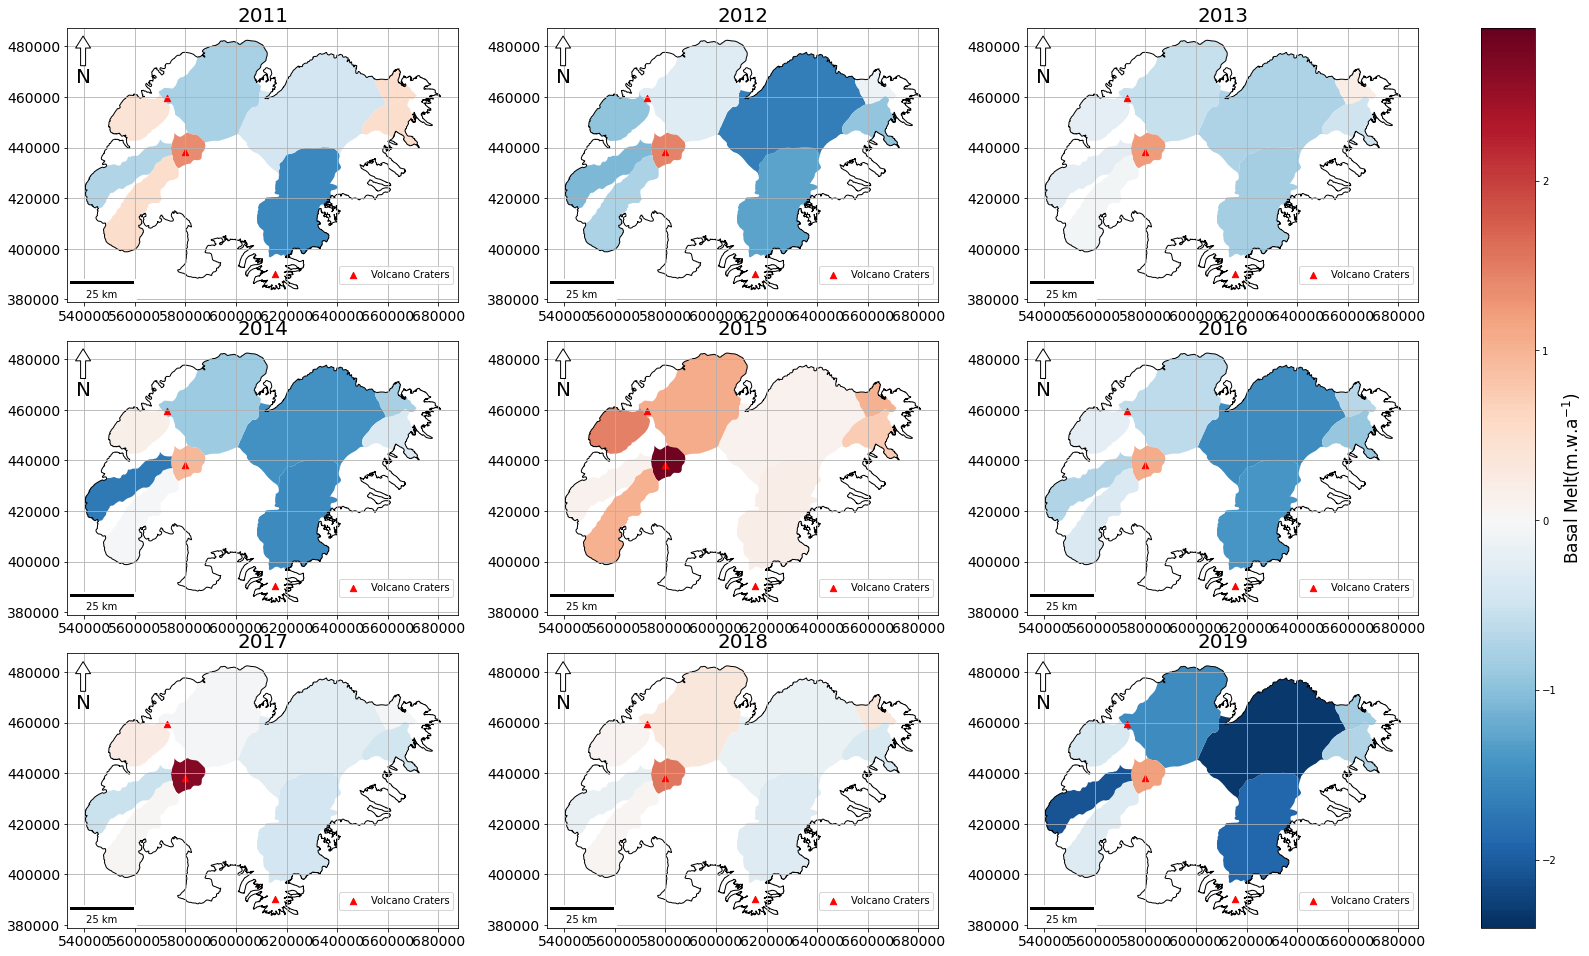

In [13]:
from matplotlib.cm import ScalarMappable

directory3 = 'merged_shp.shp'
map_df = gpd.read_file(directory3)
map_df['Basin_No'] = [0,1,2,3,4,5,6,7,8]
df = pd.read_csv('basin_pixelsums.csv')
df_merged = map_df.merge(df, left_on=['Basin_No'], right_on=['Basin_No'])

fig, axs = plt.subplots(3,3, figsize=(25,25))

Basinshp = 'shp/Vatnajokull.shp'
outline = gpd.read_file(Basinshp)
plt.rcParams.update({'font.size': 10})

norm = mcolors.TwoSlopeNorm(vmin=-2.4, vmax = 2.9, vcenter=0)

df_merged.plot(column='2011', cmap='RdBu_r',norm=norm, ax=axs[0,0])
df_merged.plot(column='2012', cmap='RdBu_r',norm=norm, ax=axs[0,1])
df_merged.plot(column='2013', cmap='RdBu_r',norm=norm, ax=axs[0,2])
df_merged.plot(column='2014', cmap='RdBu_r',norm=norm, ax=axs[1,0])
df_merged.plot(column='2015', cmap='RdBu_r',norm=norm, ax=axs[1,1])
df_merged.plot(column='2016', cmap='RdBu_r',norm=norm, ax=axs[1,2])
df_merged.plot(column='2017', cmap='RdBu_r',norm=norm, ax=axs[2,0])
df_merged.plot(column='2018', cmap='RdBu_r',norm=norm, ax=axs[2,1])
df_merged.plot(column='2019', cmap='RdBu_r',norm=norm, ax=axs[2,2])

outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[0,0]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[0,1]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[0,2]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[1,0]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[1,1]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[1,2]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[2,0]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[2,1]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[2,2]);

volcano.plot(marker='^',ax=axs[0,0], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[0,1], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[0,2], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[1,0], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[1,1], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[1,2], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[2,0], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[2,1], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[2,2], markersize=40, color='red', label='Volcano Craters', legend=True)

cbaxes = fig.add_axes([0.91, 0.4, 0.03, 0.5]) 
sm =  ScalarMappable(norm=norm, cmap='RdBu_r')
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.set_label("Basal Melt(m.w.$\mathregular{a^{-1}}$)", fontsize=17)

axs[0,0].set_title('2011', fontsize=20)
axs[0,1].set_title('2012', fontsize=20)
axs[0,2].set_title('2013', fontsize=20)
axs[1,0].set_title('2014', fontsize=20)
axs[1,1].set_title('2015', fontsize=20)
axs[1,2].set_title('2016', fontsize=20)
axs[2,0].set_title('2017', fontsize=20)
axs[2,1].set_title('2018', fontsize=20)
axs[2,2].set_title('2019', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.4,
                    right=0.9,
                    top=0.9,
                    wspace=0,
                    hspace=0.14)

axs[0,0].legend(bbox_to_anchor=(1,0.15))
axs[0,1].legend(bbox_to_anchor=(1,0.15))
axs[0,2].legend(bbox_to_anchor=(1,0.15))
axs[1,0].legend(bbox_to_anchor=(1,0.15))
axs[1,1].legend(bbox_to_anchor=(1,0.15))
axs[1,2].legend(bbox_to_anchor=(1,0.15))
axs[2,0].legend(bbox_to_anchor=(1,0.15))
axs[2,1].legend(bbox_to_anchor=(1,0.15))
axs[2,2].legend(bbox_to_anchor=(1,0.15))

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[0,2].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
axs[1,2].grid(True)
axs[2,0].grid(True)
axs[2,1].grid(True)
axs[2,2].grid(True)

scalebar = ScaleBar(1, location='lower left')
scalebar1 = ScaleBar(1, location='lower left')
scalebar2 = ScaleBar(1, location='lower left')
scalebar3 = ScaleBar(1, location='lower left')
scalebar4 = ScaleBar(1, location='lower left')
scalebar5 = ScaleBar(1, location='lower left')
scalebar6 = ScaleBar(1, location='lower left')
scalebar7 = ScaleBar(1, location='lower left')
scalebar8 = ScaleBar(1, location='lower left')

axs[0,0].add_artist(scalebar)
axs[0,1].add_artist(scalebar1)
axs[0,2].add_artist(scalebar2)
axs[1,0].add_artist(scalebar3)
axs[1,1].add_artist(scalebar4)
axs[1,2].add_artist(scalebar5)
axs[2,0].add_artist(scalebar6)
axs[2,1].add_artist(scalebar7)
axs[2,2].add_artist(scalebar8)

x, y, arrow_length = 0.04, 0.97, 0.15
axs[0,0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[0,0].transAxes)
axs[0,1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[0,1].transAxes)
axs[0,2].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[0,2].transAxes)
axs[1,0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[1,0].transAxes)
axs[1,1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[1,1].transAxes)
axs[1,2].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[1,2].transAxes)
axs[2,0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[2,0].transAxes)
axs[2,1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[2,1].transAxes)
axs[2,2].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[2,2].transAxes)
plt.savefig('Basin_melt.png')



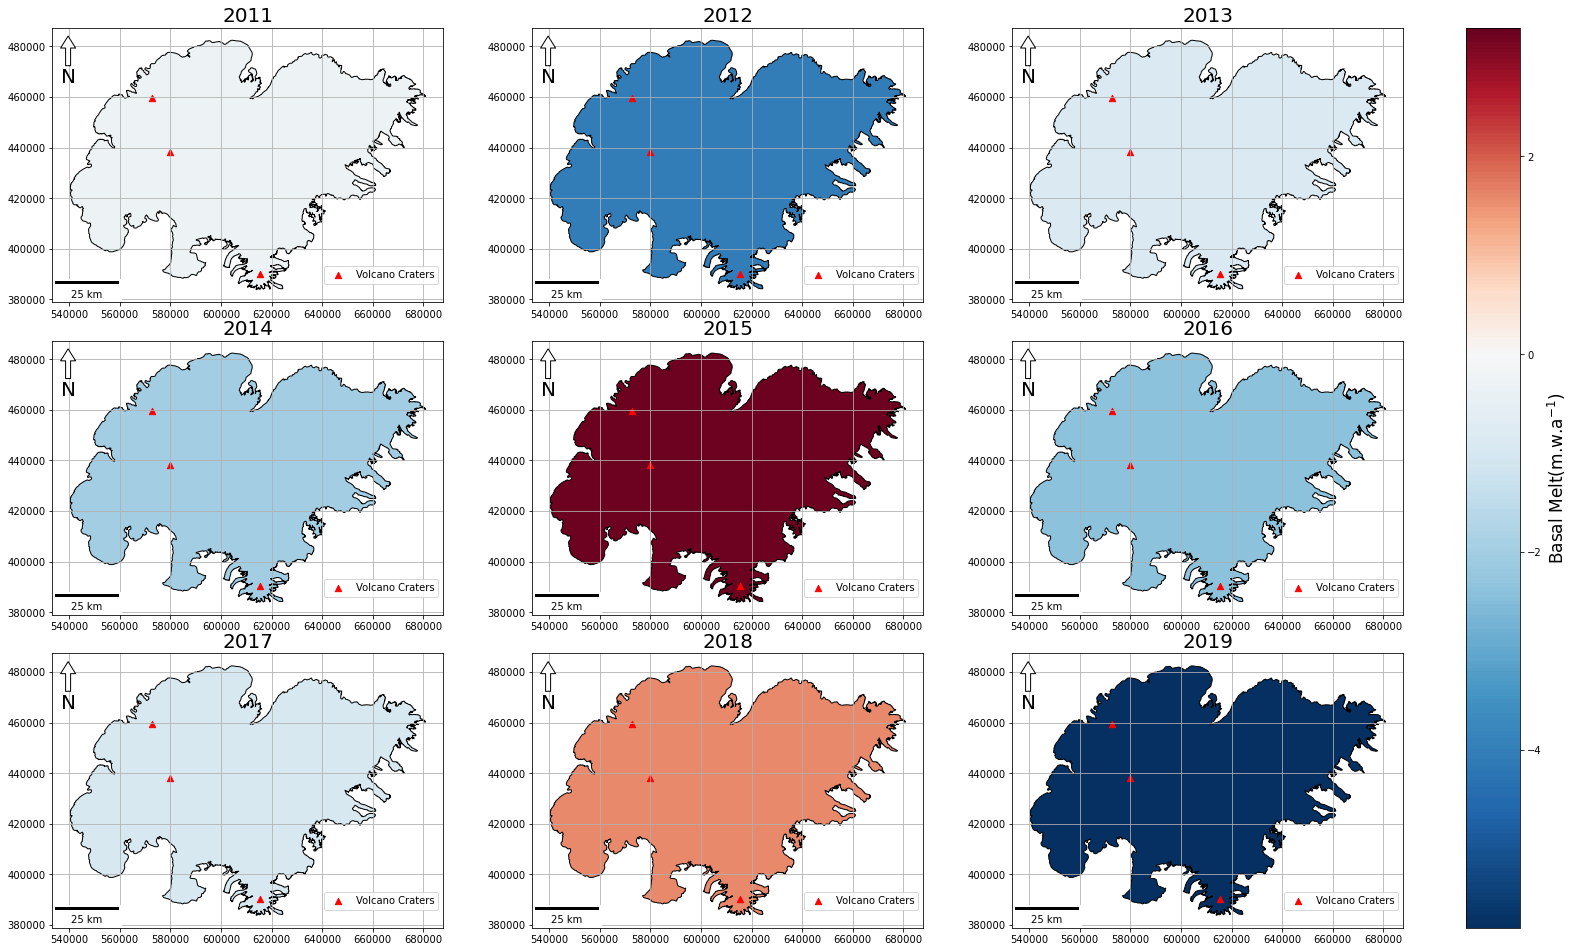

In [14]:
directory4 = 'shp/Vatnajokull.shp'
map_Vat_df = gpd.read_file(directory4)
map_Vat_df['Basin_No'] = [0]

df_Vat = pd.read_csv('Vatnajokull_pixelsums.csv')
df_Vat_merged = map_Vat_df.merge(df_Vat, left_on=['Basin_No'], right_on=['Basin_No'])

fig, axs = plt.subplots(3,3, figsize=(25,25))

Basinshp = 'shp/Vatnajokull.shp'
outline = gpd.read_file(Basinshp)
plt.rcParams.update({'font.size': 10})

norm1 = mcolors.TwoSlopeNorm(vmin=-5.8, vmax = 3.3, vcenter=0)

df_Vat_merged.plot(column='2011', cmap='RdBu_r',norm=norm1, ax=axs[0,0])
df_Vat_merged.plot(column='2012', cmap='RdBu_r',norm=norm1, ax=axs[0,1])
df_Vat_merged.plot(column='2013', cmap='RdBu_r',norm=norm1, ax=axs[0,2])
df_Vat_merged.plot(column='2014', cmap='RdBu_r',norm=norm1, ax=axs[1,0])
df_Vat_merged.plot(column='2015', cmap='RdBu_r',norm=norm1, ax=axs[1,1])
df_Vat_merged.plot(column='2016', cmap='RdBu_r',norm=norm1, ax=axs[1,2])
df_Vat_merged.plot(column='2017', cmap='RdBu_r',norm=norm1, ax=axs[2,0])
df_Vat_merged.plot(column='2018', cmap='RdBu_r',norm=norm1, ax=axs[2,1])
df_Vat_merged.plot(column='2019', cmap='RdBu_r',norm=norm1, ax=axs[2,2])

outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[0,0]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[0,1]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[0,2]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[1,0]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[1,1]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[1,2]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[2,0]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[2,1]);
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=axs[2,2]);

volcano.plot(marker='^',ax=axs[0,0], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[0,1], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[0,2], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[1,0], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[1,1], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[1,2], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[2,0], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[2,1], markersize=40, color='red', label='Volcano Craters', legend=True)
volcano.plot(marker='^',ax=axs[2,2], markersize=40, color='red', label='Volcano Craters', legend=True)

cbaxes = fig.add_axes([0.91, 0.4, 0.03, 0.5]) 
sm =  ScalarMappable(norm=norm1, cmap='RdBu_r')
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.set_label("Basal Melt(m.w.$\mathregular{a^{-1}}$)", fontsize=17)

axs[0,0].set_title('2011', fontsize=20)
axs[0,1].set_title('2012', fontsize=20)
axs[0,2].set_title('2013', fontsize=20)
axs[1,0].set_title('2014', fontsize=20)
axs[1,1].set_title('2015', fontsize=20)
axs[1,2].set_title('2016', fontsize=20)
axs[2,0].set_title('2017', fontsize=20)
axs[2,1].set_title('2018', fontsize=20)
axs[2,2].set_title('2019', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.4,
                    right=0.9,
                    top=0.9,
                    wspace=0,
                    hspace=0.14)

axs[0,0].legend(bbox_to_anchor=(1,0.15))
axs[0,1].legend(bbox_to_anchor=(1,0.15))
axs[0,2].legend(bbox_to_anchor=(1,0.15))
axs[1,0].legend(bbox_to_anchor=(1,0.15))
axs[1,1].legend(bbox_to_anchor=(1,0.15))
axs[1,2].legend(bbox_to_anchor=(1,0.15))
axs[2,0].legend(bbox_to_anchor=(1,0.15))
axs[2,1].legend(bbox_to_anchor=(1,0.15))
axs[2,2].legend(bbox_to_anchor=(1,0.15))

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[0,2].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
axs[1,2].grid(True)
axs[2,0].grid(True)
axs[2,1].grid(True)
axs[2,2].grid(True)

scalebar = ScaleBar(1, location='lower left')
scalebar1 = ScaleBar(1, location='lower left')
scalebar2 = ScaleBar(1, location='lower left')
scalebar3 = ScaleBar(1, location='lower left')
scalebar4 = ScaleBar(1, location='lower left')
scalebar5 = ScaleBar(1, location='lower left')
scalebar6 = ScaleBar(1, location='lower left')
scalebar7 = ScaleBar(1, location='lower left')
scalebar8 = ScaleBar(1, location='lower left')

axs[0,0].add_artist(scalebar)
axs[0,1].add_artist(scalebar1)
axs[0,2].add_artist(scalebar2)
axs[1,0].add_artist(scalebar3)
axs[1,1].add_artist(scalebar4)
axs[1,2].add_artist(scalebar5)
axs[2,0].add_artist(scalebar6)
axs[2,1].add_artist(scalebar7)
axs[2,2].add_artist(scalebar8)

x, y, arrow_length = 0.04, 0.97, 0.15
axs[0,0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[0,0].transAxes)
axs[0,1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[0,1].transAxes)
axs[0,2].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[0,2].transAxes)
axs[1,0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[1,0].transAxes)
axs[1,1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[1,1].transAxes)
axs[1,2].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[1,2].transAxes)
axs[2,0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[2,0].transAxes)
axs[2,1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[2,1].transAxes)
axs[2,2].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=axs[2,2].transAxes)
plt.rcParams.update({'font.size': 10})

plt.savefig('Vatnajokull_melt.png')

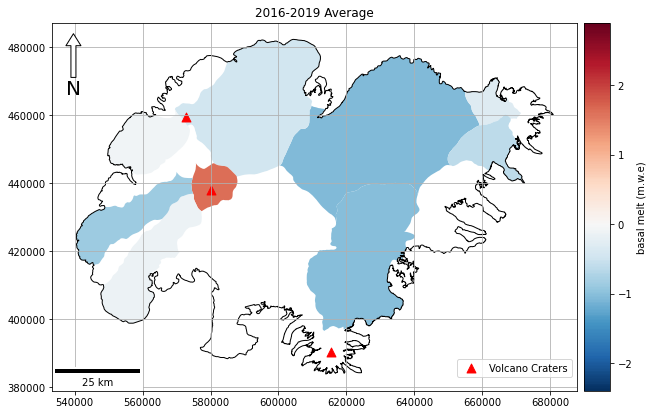

In [15]:
import matplotlib.colors as mcolors

directory713 = 'merged_shp.shp'
map_df_713 = gpd.read_file(directory713)
map_df_713['Basin_No'] = [0,1,2,3,4,5,6,7,8]
df_713 = pd.read_csv('pixelsum_713.csv')
df_merged_713 = map_df_713.merge(df_713, left_on=['Basin_No'], right_on=['Basin_No'])

Basinshp = 'shp/Vatnajokull.shp'
norm = mcolors.TwoSlopeNorm(vmin=-2.32, vmax = 2.82, vcenter=0)

fig, ax = plt.subplots(figsize=(10,10))

norm = mcolors.TwoSlopeNorm(vmin=-2.4, vmax = 2.9, vcenter=0)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
df_merged_713.plot(column='2nd_4yr_ave', cmap=plt.cm.RdBu_r, ax=ax, legend=True, cax=cax, legend_kwds={'label': "basal melt (m.w.e)"}, norm=norm)
outline = gpd.read_file(Basinshp)
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=ax);
#ice_clipped.plot(facecolor="None",edgecolor='k',linewidth = 1,ax=ax);
volcano.plot(marker='^',ax=ax, markersize=80, color='red', label='Volcano Craters', legend=True)
ax.set_title('2016-2019 Average')
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)
x, y, arrow_length = 0.04, 0.97, 0.15
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
ax.legend(bbox_to_anchor=(1,0.1))
ax.grid(True)

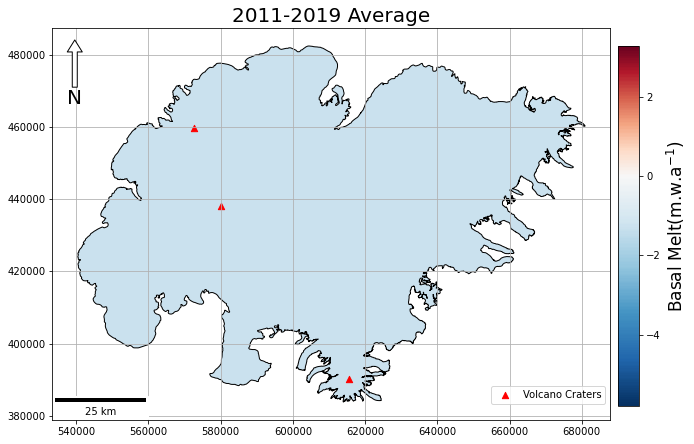

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
directory4 = 'shp/Vatnajokull.shp'
map_Vat_df = gpd.read_file(directory4)
map_Vat_df['Basin_No'] = [0]
map_Vat_df['Basal_Melt'] = [0.00011316]
df_Vat= pd.read_csv('Vatnajokull_pixelsum_713.csv')
df_Vat_merged = map_Vat_df.merge(df_Vat, left_on=['Basin_No'], right_on=['Basin_No'])

norm2 = mcolors.TwoSlopeNorm(vmin=-5.8, vmax = 3.3, vcenter=0)

df_Vat_merged.plot(column='9yr_ave', cmap='RdBu_r',norm=norm2, ax=ax)
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=ax)
volcano.plot(marker='^',ax=ax, markersize=40, color='red', label='Volcano Craters', legend=True)

cbaxes = fig.add_axes([0.91, 0.25, 0.03, 0.5]) 
sm =  ScalarMappable(norm=norm2, cmap='RdBu_r')
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.set_label("Basal Melt(m.w.$\mathregular{a^{-1}}$)", fontsize=17)

ax.set_title('2011-2019 Average', fontsize=20)
ax.grid(True)

scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)
x, y, arrow_length = 0.04, 0.97, 0.15
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
ax.legend(bbox_to_anchor=(1,0.1))
ax.grid(True)

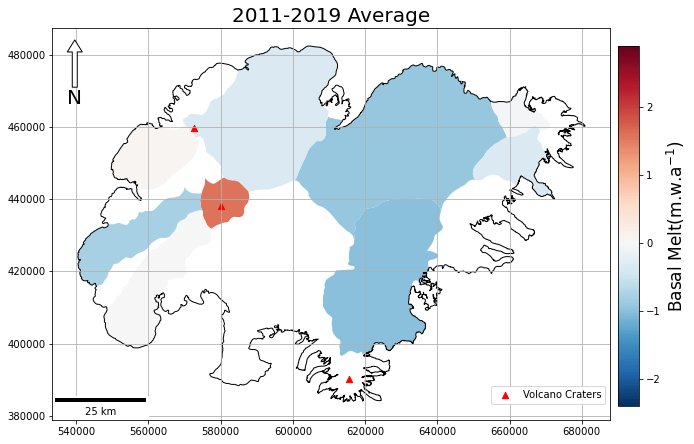

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 10})
df_merged.plot(column='9yr_ave', cmap='RdBu_r',norm=norm, ax=ax)
outline.plot(facecolor="None",edgecolor='k',linewidth = 1, ax=ax)
volcano.plot(marker='^',ax=ax, markersize=40, color='red', label='Volcano Craters', legend=True)

norm = mcolors.TwoSlopeNorm(vmin=-2.4, vmax = 2.9, vcenter=0)

cbaxes = fig.add_axes([0.91, 0.25, 0.03, 0.5]) 
sm =  ScalarMappable(norm=norm, cmap='RdBu_r')
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbaxes)
cbar.set_label("Basal Melt(m.w.$\mathregular{a^{-1}}$)", fontsize=17)

ax.set_title('2011-2019 Average', fontsize=20)
ax.grid(True)

scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)
x, y, arrow_length = 0.04, 0.97, 0.15
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
ax.legend(bbox_to_anchor=(1,0.1))
ax.grid(True)